In [277]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
html_page = requests.get('https://www.worldlifeexpectancy.com/usa/life-expectancy') 
soup = BeautifulSoup(html_page.content, 'html.parser')

In [16]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="target-densitydpi=device-dpi" name="viewport"/>
  <title>
   USA Life Expectancy
  </title>
  <meta content="USA Life Expectancy  with rankings for US States." name="description"/>
  <meta content="Life Expectancy , United States, CDC Data, Census Bureau, Rankings, Chart, compare, Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming" name="keywords"/

In [177]:
states_script = soup.findChildren('script', {"type":'text/javascript'})[3]

In [178]:
states_script

<script type="text/javascript">
var_categories   = ['Hawaii 1. ','Minnesota 2. ','Connecticut 3. ','California 4. ','Massachusetts 5. ','New York 6. ','Vermont 7. ','New Hampshire 8. ','New Jersey 9. ','Utah 10. ','Colorado 11. ','Wisconsin 12. ','Washington 13. ','Rhode Island 14. ','Nebraska 15. ','Iowa 16. ','Arizona 17. ','North Dakota 18. ','Oregon 19. ','Idaho 20. ','South Dakota 21. ','Florida 22. ','Maine 23. ','Virginia 24. ','Illinois 25. ','Maryland 26. ','Kansas 27. ','Pennsylvania 28. ','Montana 29. ','Texas 30. ','New Mexico 31. ','Delaware 32. ','Wyoming 33. ','Alaska 34. ','Michigan 35. ','Nevada 36. ','North Carolina 37. ','Ohio 38. ','Indiana 39. ','Missouri 40. ','Georgia 41. ','South Carolina 42. ','District of Columbia 43. ','Tennessee 44. ','Kentucky 45. ','Arkansas 46. ','Oklahoma 47. ','Louisiana 48. ','Alabama 49. ','West Virginia 50. ','Mississippi 51. ',];
        
var_data =  [81.30,81.05,80.82,80.77,80.52,80.48,80.45,80.32,80.28,80.20,80.02,79.98,79.92,79.8

In [192]:
states = states_script.contents[0][22:860]
states_list = states.split(',')
all_states = []
for i in states_list:
    just_states = re.sub('[^a-zA-Z]+', '', i)
    all_states.append(just_states)
all_states

['Hawaii',
 'Minnesota',
 'Connecticut',
 'California',
 'Massachusetts',
 'NewYork',
 'Vermont',
 'NewHampshire',
 'NewJersey',
 'Utah',
 'Colorado',
 'Wisconsin',
 'Washington',
 'RhodeIsland',
 'Nebraska',
 'Iowa',
 'Arizona',
 'NorthDakota',
 'Oregon',
 'Idaho',
 'SouthDakota',
 'Florida',
 'Maine',
 'Virginia',
 'Illinois',
 'Maryland',
 'Kansas',
 'Pennsylvania',
 'Montana',
 'Texas',
 'NewMexico',
 'Delaware',
 'Wyoming',
 'Alaska',
 'Michigan',
 'Nevada',
 'NorthCarolina',
 'Ohio',
 'Indiana',
 'Missouri',
 'Georgia',
 'SouthCarolina',
 'DistrictofColumbia',
 'Tennessee',
 'Kentucky',
 'Arkansas',
 'Oklahoma',
 'Louisiana',
 'Alabama',
 'WestVirginia',
 'Mississippi']

In [194]:
list(enumerate(all_states))

[(0, 'Hawaii'),
 (1, 'Minnesota'),
 (2, 'Connecticut'),
 (3, 'California'),
 (4, 'Massachusetts'),
 (5, 'NewYork'),
 (6, 'Vermont'),
 (7, 'NewHampshire'),
 (8, 'NewJersey'),
 (9, 'Utah'),
 (10, 'Colorado'),
 (11, 'Wisconsin'),
 (12, 'Washington'),
 (13, 'RhodeIsland'),
 (14, 'Nebraska'),
 (15, 'Iowa'),
 (16, 'Arizona'),
 (17, 'NorthDakota'),
 (18, 'Oregon'),
 (19, 'Idaho'),
 (20, 'SouthDakota'),
 (21, 'Florida'),
 (22, 'Maine'),
 (23, 'Virginia'),
 (24, 'Illinois'),
 (25, 'Maryland'),
 (26, 'Kansas'),
 (27, 'Pennsylvania'),
 (28, 'Montana'),
 (29, 'Texas'),
 (30, 'NewMexico'),
 (31, 'Delaware'),
 (32, 'Wyoming'),
 (33, 'Alaska'),
 (34, 'Michigan'),
 (35, 'Nevada'),
 (36, 'NorthCarolina'),
 (37, 'Ohio'),
 (38, 'Indiana'),
 (39, 'Missouri'),
 (40, 'Georgia'),
 (41, 'SouthCarolina'),
 (42, 'DistrictofColumbia'),
 (43, 'Tennessee'),
 (44, 'Kentucky'),
 (45, 'Arkansas'),
 (46, 'Oklahoma'),
 (47, 'Louisiana'),
 (48, 'Alabama'),
 (49, 'WestVirginia'),
 (50, 'Mississippi')]

In [261]:
ages = states_script.contents[0][887:1192]
ages_list = ages.split(',')
all_ages = []
for age in ages_list:
    all_ages.append(float(age))
all_ages

[81.3,
 81.05,
 80.82,
 80.77,
 80.52,
 80.48,
 80.45,
 80.32,
 80.28,
 80.2,
 80.02,
 79.98,
 79.92,
 79.87,
 79.84,
 79.71,
 79.64,
 79.55,
 79.52,
 79.49,
 79.47,
 79.45,
 79.19,
 79.01,
 78.96,
 78.81,
 78.73,
 78.5,
 78.49,
 78.45,
 78.43,
 78.36,
 78.34,
 78.29,
 78.23,
 78.05,
 77.81,
 77.75,
 77.61,
 77.55,
 77.23,
 76.95,
 76.53,
 76.3,
 75.97,
 75.96,
 75.88,
 75.71,
 75.42,
 75.4,
 74.96]

In [260]:
list(zip(all_states, all_ages))

[('Hawaii', 81.3),
 ('Minnesota', 81.05),
 ('Connecticut', 80.82),
 ('California', 80.77),
 ('Massachusetts', 80.52),
 ('NewYork', 80.48),
 ('Vermont', 80.45),
 ('NewHampshire', 80.32),
 ('NewJersey', 80.28),
 ('Utah', 80.2),
 ('Colorado', 80.02),
 ('Wisconsin', 79.98),
 ('Washington', 79.92),
 ('RhodeIsland', 79.87),
 ('Nebraska', 79.84),
 ('Iowa', 79.71),
 ('Arizona', 79.64),
 ('NorthDakota', 79.55),
 ('Oregon', 79.52),
 ('Idaho', 79.49),
 ('SouthDakota', 79.47),
 ('Florida', 79.45),
 ('Maine', 79.19),
 ('Virginia', 79.01),
 ('Illinois', 78.96),
 ('Maryland', 78.81),
 ('Kansas', 78.73),
 ('Pennsylvania', 78.5),
 ('Montana', 78.49),
 ('Texas', 78.45),
 ('NewMexico', 78.43),
 ('Delaware', 78.36),
 ('Wyoming', 78.34),
 ('Alaska', 78.29),
 ('Michigan', 78.23),
 ('Nevada', 78.05),
 ('NorthCarolina', 77.81),
 ('Ohio', 77.75),
 ('Indiana', 77.61),
 ('Missouri', 77.55),
 ('Georgia', 77.23),
 ('SouthCarolina', 76.95),
 ('DistrictofColumbia', 76.53),
 ('Tennessee', 76.3),
 ('Kentucky', 75.97),

In [262]:
df = pd.DataFrame()

In [270]:
st = pd.Series([all_states, all_ages], ['State', 'Life Expectancy '])

In [271]:
st

State               [Hawaii, Minnesota, Connecticut, California, M...
Life Expectancy     [81.3, 81.05, 80.82, 80.77, 80.52, 80.48, 80.4...
dtype: object

In [ ]:
df = pd.DataFrame(columns=list("ABC"))
df.loc[len(df)] = [1,2,3]

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


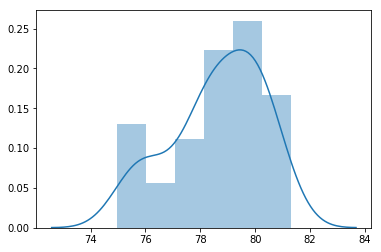

In [273]:
sns.distplot(all_ages)

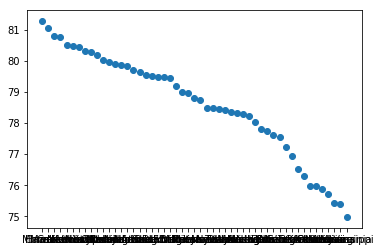

In [276]:
plt.scatter(all_states, all_ages)